In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("hashtags.csv")

In [3]:
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [4]:
df.columns

Index(['author', 'content', 'country', 'date_time', 'id', 'language',
       'latitude', 'longitude', 'number_of_likes', 'number_of_shares'],
      dtype='object')

In [7]:
import regex as re
def get_hashtag(text):
    tag=re.findall(r'#\w+', text.lower())
    return tag

df['cleaned_hashtag']=df['content'].apply(get_hashtag)

In [10]:
df_exploded = df.explode('cleaned_hashtag')

In [14]:
df_exploded=df_exploded.dropna(subset='cleaned_hashtag')

In [18]:
new_df=df_exploded.groupby('cleaned_hashtag').size().reset_index(name="hashtag_counts")

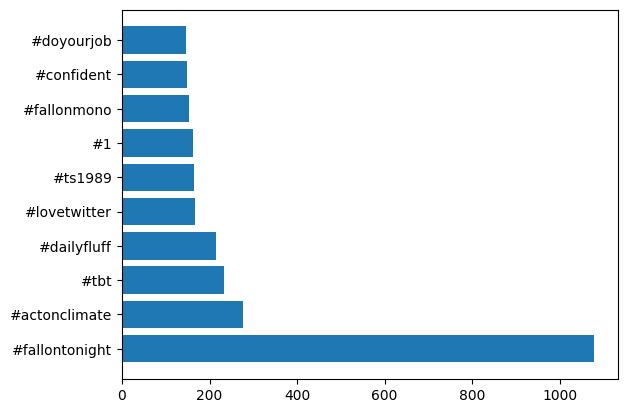

In [26]:
import matplotlib.pyplot as plt
plt.barh(new_df.sort_values(by="hashtag_counts",ascending=False).head(10)['cleaned_hashtag'],new_df.sort_values(by="hashtag_counts",ascending=False).head(10)['hashtag_counts'])
plt.show()
#new_df.sort_values(by="hashtag_counts",ascending=False).head(10)['cleaned_hashtag']

In [31]:
new_df1=df_exploded.groupby('cleaned_hashtag')['number_of_shares'].count().reset_index(name='shares')

In [32]:
new_df1

,cleaned_hashtag,shares
0,#1,162
1,#100bestcos,1
2,#100thchattyshow,1
3,#10days,4
4,#10daystildangerouswoman,1
...,...,...
7518,#zulu,1
7519,#⃣️,1
7520,#さようなら,1
7521,#日食,1
